# sequana_coverage test case example (Bacteria Staphylococcus aureus)

This notebook creates the BED file provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

**WARNING**: you need an account on synapse to get the FastQ files.

First, downloads 2 FastQ from Synapse, its reference genome and its genbank annotation. Then, it performs the mapping using BWA to get a BAM file. The BAM file is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.


At the bottom of the page, we also added an example of an application where we show that some SNPs could be discarded or assigned a negative score when they appear next or within a ROIs.

Versions used:
- sequana 0.6.4
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download the genbank and genome reference

In [2]:
from bioservices import ENA
ena = ENA()
data = ena.get_data("FN433596", frmt="fasta")
with open("FN433596.fasta", "wb") as fh:
    fh.write(data)

# Download the fastq files

### Method1: ftp from EBI website

In [3]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_1.fastq.gz
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_2.fastq.gz

--2018-01-30 16:01:49--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_1.fastq.gz
           => ‘ERR036019_1.fastq.gz’
Resolving ftp.sra.ebi.ac.uk... 193.62.192.7
Connecting to ftp.sra.ebi.ac.uk|193.62.192.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/ERR036/ERR036019 ... done.
==> SIZE ERR036019_1.fastq.gz ... 450249800
==> PASV ... done.    ==> RETR ERR036019_1.fastq.gz ... done.
Length: 450249800 (429M) (unauthoritative)

ERR036019_1.fastq.g 100%[===================>] 429.39M  8.61MB/s    in 60s     

2018-01-30 16:02:51 (7.18 MB/s) - ‘ERR036019_1.fastq.gz’ saved [450249800]

--2018-01-30 16:02:51--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR036/ERR036019/ERR036019_2.fastq.gz
           => ‘ERR036019_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk... 193.62.192.7
Connecting to ftp.sra.ebi.ac.uk|193.62.192.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.

### Method2: synapse 

In [4]:
#import synapseclient
#l = synapseclient.login()
#_ = l.get("syn10638533", downloadLocation=".", ifcollision="overwrite.local")
#_ = l.get("syn10638546", downloadLocation=".", ifcollision="overwrite.local")

# Map the reads
**depending on your system this step may take a while** (10-30mins)

In [5]:
!sequana_mapping --file1 ERR036019_1.fastq.gz --file2 ERR036019_2.fastq.gz --reference FN433596.fasta --thread 4

Theoretical Depth of Coverage : 453.4815540169755
[bwa_index] Pack FASTA... 0.02 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.87 seconds elapse.
[bwa_index] Update BWT... 0.01 sec
[bwa_index] Pack forward-only FASTA... 0.01 sec
[bwa_index] Construct SA from BWT and Occ... 0.31 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index FN433596.fasta
[main] Real time: 1.409 sec; CPU: 1.236 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 533334 sequences (40000050 bp)...
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (12, 263542, 7, 3)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (199, 742, 7139)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 21019)
[M::mem_pestat] mean and std.dev: (2815.92, 3264.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 27959)
[M::mem_pesta

[M::mem_process_seqs] Processed 533334 reads in 18.741 CPU sec, 4.782 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (19, 262156, 5, 7)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (119, 243, 6146)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 18200)
[M::mem_pestat] mean and std.dev: (2169.21, 2979.61)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 24227)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (219, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 570)
[M::mem_pestat] mean and std.dev: (282.74, 85.91)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 687)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enou

[M::mem_process_seqs] Processed 533334 reads in 19.716 CPU sec, 5.054 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (17, 255691, 2, 7)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (122, 214, 3940)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 11576)
[M::mem_pestat] mean and std.dev: (2069.82, 3214.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 15394)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (220, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 568)
[M::mem_pestat] mean and std.dev: (282.92, 85.61)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 684)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enou

[M::mem_process_seqs] Processed 533334 reads in 21.709 CPU sec, 5.532 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (9, 252065, 5, 5)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (219, 269, 336)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 570)
[M::mem_pestat] mean and std.dev: (282.92, 85.79)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 687)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 533334 reads in 19.357 CPU sec, 4.924 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (20, 257596, 8, 13)
[M::mem_pestat] analyzing insert size distributi

[M::mem_process_seqs] Processed 533334 reads in 22.071 CPU sec, 5.582 real sec
[M::process] read 533334 sequences (40000050 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (12, 220685, 3, 6)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (172, 273, 1618)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 4510)
[M::mem_pestat] mean and std.dev: (335.90, 434.60)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 5956)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (218, 267, 334)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 566)
[M::mem_pestat] mean and std.dev: (280.82, 85.16)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 682)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough p

## Convert BAM to BED

In [6]:
!bedtools genomecov -d -ibam FN433596.fasta.sorted.bam > FN433596.bed

## Filter the BAM file to get a 4-columns BED file
- first column, as usual contains chromosome name
- second column contains the position
- third column contains the coverage
- fourth column contains the coverage for mapped reads with high quality

In [7]:
!samtools view -q 35 -o FN433596.filtered.bam FN433596.fasta.sorted.bam
!samtools depth -d 20000 FN433596.fasta.sorted.bam FN433596.filtered.bam -aa > FN433596.filtered.bed

# get a genbank (for the standalone sequana_coverage)

In [8]:
from sequana.snpeff import download_fasta_and_genbank
download_fasta_and_genbank("FN433596", "FN433596", fasta=False)

# Sequana coverage (library)

In [9]:
from sequana import GenomeCov
# load the BED and genbank file
b = GenomeCov("FN433596.bed", "FN433596.gbk")
b.compute_gc_content("FN433596.fasta")

In [12]:
# load the first chromosome and compute running median and get z-scores
chromosome = b.chr_list[0]
chromosome.run(30001, circular=True)

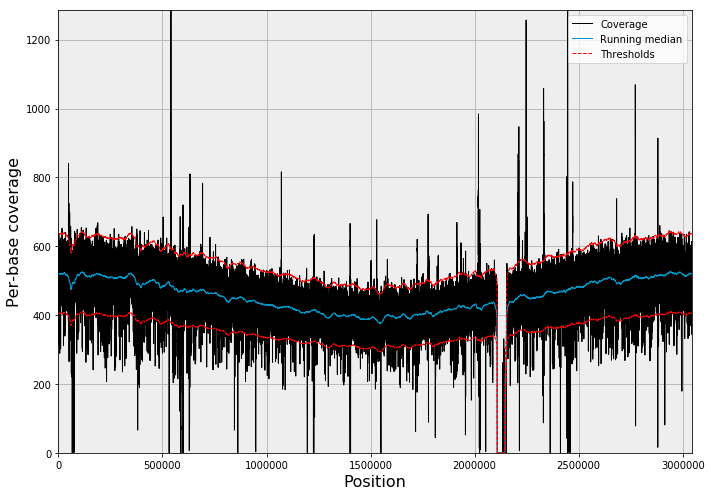

In [13]:
# 5Mb data points. So, this may take a while.
chromosome.plot_coverage()

# You can also use the sequana_coverage standalone application

In [17]:
#!sequana_coverage --input FN433596.bed --reference FN433596.fasta --genbank FN433596.gbk -w 80001
!sequana_coverage --input FN433596.bed --reference FN433596.fasta  -w 80001 -o

INFO    [sequana]:  Reading FN433596.bed. This may take time depending on your input file
INFO    [sequana]:  Scanning input file (chunk of 5000000 rows)
INFO    [sequana]:  Computing GC content
WARNING [sequana]:  There is only one chromosome. Selected automatically.
INFO    [sequana]:  Computing some metrics
INFO    [sequana]:  
Genome length:    3043210
Sequencing depth (DOC):                     447.81 
Sequencing depth (median):                  453.00 
Breadth of coverage (BOC) (percent):         98.46 
Genome coverage standard deviation :         84.12
Genome coverage coefficient variation :       0.19
INFO    [sequana]:  Using running median (w=80001)
INFO    [sequana]:  Number of mixture models 2 
INFO    [sequana]:  Fitted central distribution (first chunk): mu=1.002, sigma=0.075, pi=0.948
INFO    [sequana]:  Searching for ROIs (threshold=[-4,4] ; double =[-2.0,2.0])
INFO    [sequana]:  Number of ROIs found: 660
INFO    [sequana]:      - below average: 557
INFO    [sequana]: 

**You can now open the report ./report/multiqc_report.html **

# Application: SNP annotation

In the directory, we provide a file called ERR036019.filter.vcf that contains 
a VCF file generated with the Variant Calling pipeline described here
http://sequana.readthedocs.io/en/master/pipeline_variant_calling.html

Here below, we read the VCF, the coverage and the ROIs found by the sequana_coverage tool. For a few examples, we plot the coverage, the ROIS (blue areas) and the SNPs found. We show that SNPs we low quality also coincide with ROIs. They may be further discarded and confirmed to be poor quality SNPs.

In [24]:
# The file ERR036019.filter.vcf was generated with sequana pipeline variantcalling
# version 0.6.2 using sequanix interface. The config file and pipeline 
# can be found in ./pipeline directory

# The rois.csv file was generated by the sequana_coverage command here above
# in 
import pandas as pd
roi = pd.read_csv("rois.csv")


from sequana.freebayes_vcf_filter import VCF_freebayes as VCF
vcf = VCF("ERR036019.filter.vcf")
variants = [v for v in vcf]
positions = [v.POS for v in variants]
quality = [v.QUAL for v in variants]  # freebayes score
M = max(quality)
scores = [x/M*100 for x in quality] # normalise
depths = [chromosome.df['cov'].iloc[pos] for pos in positions]

In [25]:
def plot_variant(x1=526000, x2=538000):
    clf()
    chromosome.plot_coverage()
    low = roi[roi.mean_cov<roi.mean_rm]
    high = roi[roi.mean_cov>roi.mean_rm]

    chr = chromosome
    highT = (chr.thresholds.high * chr.best_gaussian["sigma"] +
         chr.best_gaussian["mu"]) * chr.df["rm"]
    lowT = (chr.thresholds.low * chr.best_gaussian["sigma"] +
        chr.best_gaussian["mu"]) * chr.df["rm"]

    for k,v in low.iterrows():        
        Y1 = chr.df['cov'].iloc[v.start:v.end]
        Y2 = lowT.iloc[v.start:v.end] 
        Y1 = Y1.combine(Y2, max) *0
        if v.start > x1 and v.end<x2:
            fill_between(range(v.start, v.end), Y1, Y2, alpha=0.6, color="blue")
    
    for k,v in high.iterrows():
        Y1 = highT.iloc[v.start:v.end]
        Y2 = chr.df['cov'].iloc[v.start:v.end]
        Y2 = Y2.combine(Y1,max)
        if v.start > x1 and v.end<x2:
            fill_between(range(v.start, v.end), y1=Y1,y2=Y2 ,alpha=0.6, color="orange")

    scatter(positions, depths, c=scores, s=150)
    colorbar()
    xlim([x1,x2])

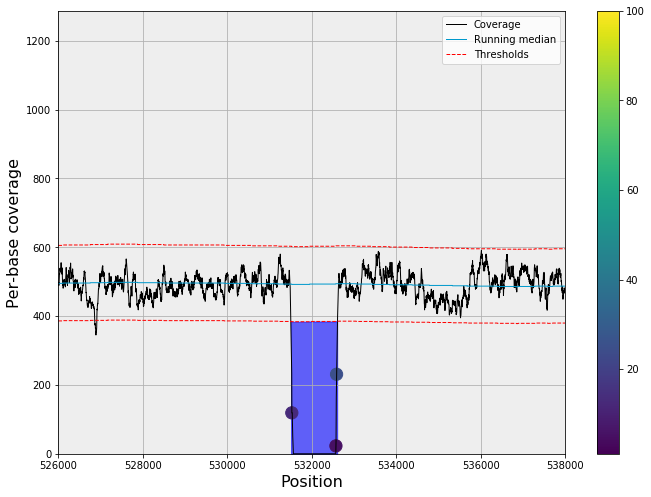

In [30]:
plot_variant()

Here, the color in the RHS indicates the quality of the SNPs

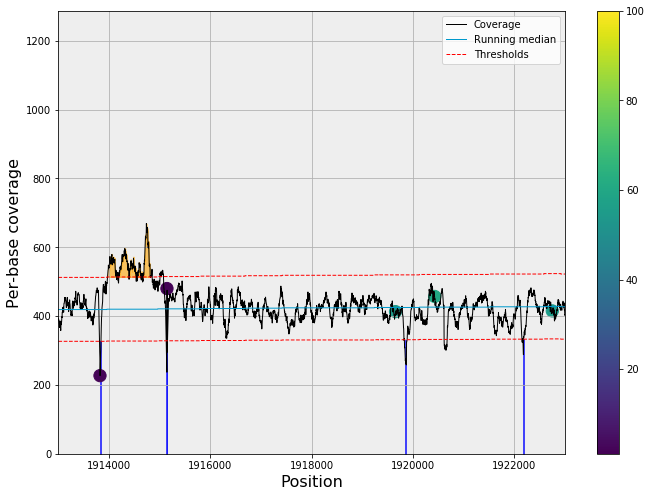

In [27]:
plot_variant(1913000,1923000)

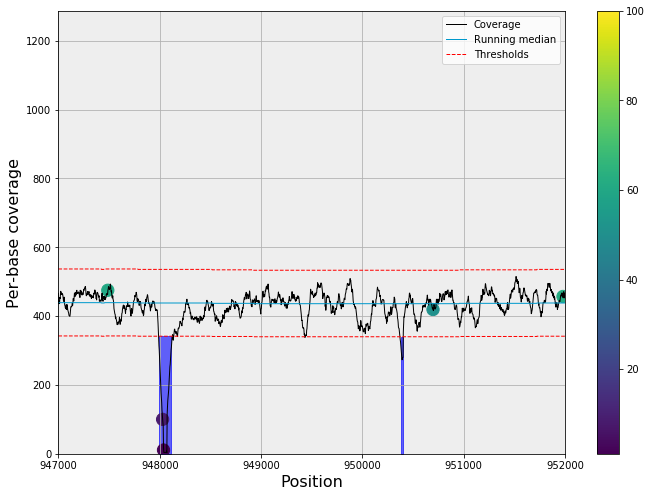

In [28]:
plot_variant(947000, 952000)